# EDA

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
cust=pd.read_csv('Customers.csv')
cust.sample(10)

,CustomerID,CustomerName,Region,SignupDate
6,C0007,Paul Graves,Asia,2022-06-18
84,C0085,Richard Brown,South America,2024-09-22
198,C0199,Andrea Jenkins,Europe,2022-12-03
167,C0168,Karen Clements MD,South America,2022-12-13
49,C0050,Ryan Davis,North America,2024-03-02
39,C0040,Michael Harrell,Asia,2022-03-07
168,C0169,Jennifer Shaw,South America,2023-04-13
135,C0136,Kristen Holder,Asia,2024-03-14
76,C0077,Scott Sims,South America,2023-10-18
149,C0150,Angela Williams,South America,2022-09-13


In [72]:
prod=pd.read_csv('Products.csv')
prod.sample(10)

,ProductID,ProductName,Category,Price
59,P060,HomeSense T-Shirt,Clothing,155.65
78,P079,ActiveWear Rug,Home Decor,417.37
74,P075,TechPro Textbook,Books,497.76
61,P062,HomeSense Novel,Books,374.16
27,P028,HomeSense Desk Lamp,Home Decor,235.58
60,P061,HomeSense Desk Lamp,Home Decor,156.96
10,P011,SoundWave Desk Lamp,Home Decor,261.20
67,P068,TechPro Novel,Books,447.23
9,P010,ComfortLiving Smartwatch,Electronics,350.13
46,P047,ComfortLiving Cookware Set,Home Decor,159.33


In [73]:
trans=pd.read_csv('Transactions.csv')
trans.sample(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
254,T00169,C0152,P051,2024-06-09 15:20:30,1,65.16,65.16
500,T00743,C0172,P074,2024-01-21 13:21:23,3,886.74,295.58
741,T00931,C0114,P043,2024-09-04 22:08:05,4,1617.60,404.40
357,T00979,C0112,P050,2024-05-08 03:42:39,3,1312.95,437.65
269,T00896,C0093,P086,2024-03-26 18:01:53,1,440.70,440.70
288,T00447,C0035,P068,2024-09-30 17:00:33,3,1341.69,447.23
876,T00809,C0078,P075,2024-12-09 11:44:44,2,995.52,497.76
699,T00688,C0116,P064,2024-05-22 04:00:43,1,452.42,452.42
155,T00750,C0056,P070,2024-12-25 21:16:21,4,194.76,48.69
794,T00474,C0168,P097,2024-04-01 14:59:11,1,319.34,319.34


In [110]:
print(cust.shape)
print(prod.shape)
print(trans.shape)

(200, 5)
(100, 4)
(1000, 8)


In [74]:
cust.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [75]:
prod.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [76]:
trans.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [77]:
cust.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [78]:
prod.isnull().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [79]:
trans.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


# Insight 1: Distribution of Customers Across Regions

In [80]:
region_distribution = cust['Region'].value_counts()
region_distribution

,count
Region,
South America,59
Europe,50
North America,46
Asia,45


<ipython-input-81-befcf5cc9e62>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="viridis")


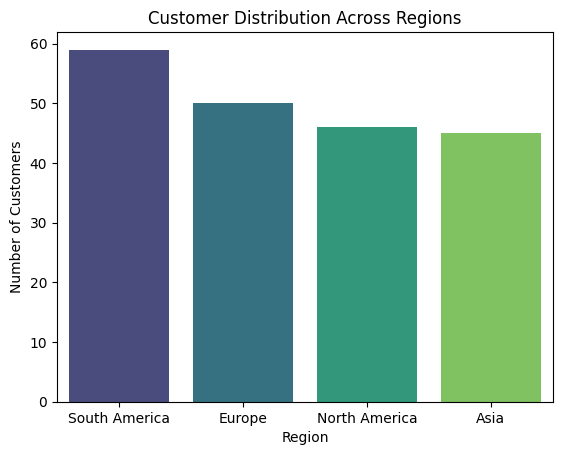

In [81]:
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="viridis")
plt.title("Customer Distribution Across Regions")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

# Insight 2: Most Frequently Purchased Product Categories

In [82]:
merged_data = pd.merge(trans, prod, on='ProductID')
merged_data.sample(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
394,T00186,C0098,P078,2024-04-02 07:44:01,1,41.18,41.18,HomeSense Rug,Home Decor,41.18
232,T00444,C0127,P084,2024-02-08 03:30:38,1,337.91,337.91,ActiveWear Wall Art,Home Decor,337.91
626,T00195,C0023,P066,2024-11-02 10:20:14,1,337.22,337.22,SoundWave Textbook,Books,337.22
152,T00087,C0108,P070,2024-02-16 19:58:26,1,48.69,48.69,HomeSense T-Shirt,Clothing,48.69
239,T00025,C0027,P003,2024-10-11 21:32:34,4,176.48,44.12,ComfortLiving Biography,Books,44.12
706,T00689,C0024,P090,2024-05-30 00:00:01,2,330.60,165.30,ComfortLiving Biography,Books,165.30
699,T00688,C0116,P064,2024-05-22 04:00:43,1,452.42,452.42,HomeSense Running Shoes,Clothing,452.42
60,T00846,C0134,P087,2024-11-10 10:56:19,4,1160.68,290.17,TechPro Running Shoes,Clothing,290.17
474,T00806,C0062,P059,2024-01-04 21:05:07,2,606.40,303.20,SoundWave Jeans,Clothing,303.20
810,T00825,C0070,P099,2024-02-08 14:20:05,1,354.29,354.29,SoundWave Mystery Book,Books,354.29


In [83]:
category_distribution = merged_data['Category'].value_counts()
category_distribution

,count
Category,
Books,270
Electronics,254
Home Decor,248
Clothing,228


<ipython-input-84-0a12d64d2882>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="coolwarm")


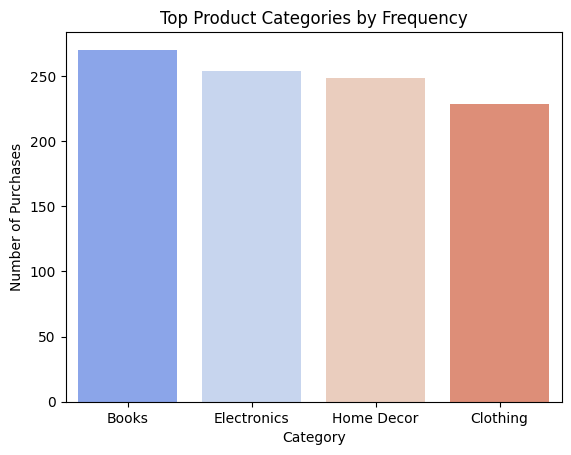

In [84]:
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="coolwarm")
plt.title("Top Product Categories by Frequency")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.show()

# Insight 3: Revenue Contribution by Product Category

In [85]:
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue

,TotalValue
Category,
Books,192147.47
Electronics,180783.50
Clothing,166170.66
Home Decor,150893.93


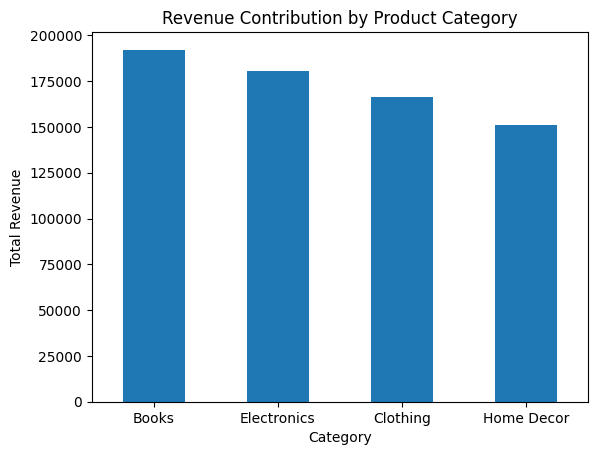

In [86]:
category_revenue.plot(kind='bar')
plt.title("Revenue Contribution by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()

# Insight 4: Top Customers Generate Disproportionate Revenue

In [87]:
customer_revenue = trans.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
customer_revenue.sample(5)

,TotalValue
CustomerID,
C0056,3182.94
C0191,2997.97
C0124,4264.33
C0064,4039.77
C0071,1400.83


In [107]:
cumulative_revenue = customer_revenue.cumsum() / customer_revenue.sum() * 100
cumulative_revenue.sample(5)

,TotalValue
CustomerID,
C0088,91.106366
C0124,51.509733
C0137,68.472177
C0148,29.014290
C0030,85.706575


In [89]:
top_10_percent_revenue = cumulative_revenue[cumulative_revenue <= 50]
top_10_percent_revenue

,TotalValue
CustomerID,
C0141,1.546948
C0054,2.712229
C0065,3.822917
C0156,4.929367
C0082,6.026897
C0188,7.057529
C0059,8.082649
C0028,9.070999
C0099,10.044298


In [90]:
print(f"Top {len(top_10_percent_revenue)} customers contribute 50% of revenue.")

Top 60 customers contribute 50% of revenue.


# Insight 5: Seasonal Trends in Transactions

In [91]:
trans.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [92]:
trans['TransactionDate'] = pd.to_datetime(trans['TransactionDate'])
trans['Month'] = trans['TransactionDate'].dt.month
trans.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Month
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,8
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,5
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,4
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,3
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,3


In [93]:
monthly_transactions = trans['Month'].value_counts().sort_index()
monthly_transactions

,count
Month,
1,107
2,77
3,80
4,86
5,86
6,69
7,96
8,94
9,96


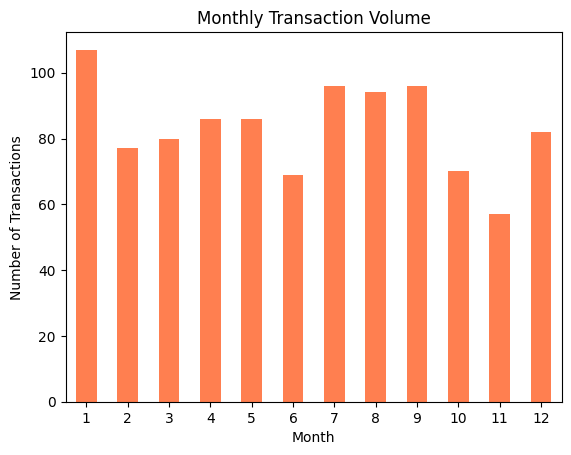

In [94]:
monthly_transactions.plot(kind='bar', color='coral')
plt.title("Monthly Transaction Volume")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.show()

# Insight 6: Relationship Between Price and Purchase Volume

In [96]:
merged_data.sample(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
282,T00118,C0082,P068,2024-11-30 07:11:48,3,1341.69,447.23,TechPro Novel,Books,447.23
409,T00090,C0072,P039,2024-03-10 16:04:33,4,1722.36,430.59,TechPro Smartwatch,Electronics,430.59
161,T00292,C0086,P010,2024-12-26 02:30:22,2,700.26,350.13,ComfortLiving Smartwatch,Electronics,350.13
987,T00379,C0004,P077,2024-12-23 14:13:52,4,1062.04,265.51,ActiveWear Smartwatch,Electronics,265.51
256,T00386,C0116,P051,2024-09-03 03:40:56,4,260.64,65.16,ComfortLiving Desk Lamp,Home Decor,65.16
67,T00269,C0124,P053,2024-02-06 16:22:41,4,1099.76,274.94,TechPro Rug,Home Decor,274.94
389,T00871,C0084,P027,2024-03-12 11:15:01,4,916.24,229.06,SoundWave Headphones,Electronics,229.06
319,T00659,C0013,P036,2024-11-03 05:30:39,3,1117.65,372.55,BookWorld Jacket,Clothing,372.55
869,T00969,C0149,P012,2024-07-30 08:34:58,3,478.80,159.60,ComfortLiving Headphones,Electronics,159.60
940,T00963,C0199,P008,2024-10-26 00:01:58,2,293.70,146.85,BookWorld Bluetooth Speaker,Electronics,146.85


In [101]:
merged_data = merged_data.rename(columns={"Price_x": "Price"})
merged_data = merged_data.drop(columns=["Price_y"], errors="ignore")
merged_data.sample(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category
278,T00539,C0159,P047,2024-12-13 17:21:14,4,637.32,159.33,ComfortLiving Cookware Set,Home Decor
748,T00799,C0061,P035,2024-12-10 16:00:56,1,30.59,30.59,ActiveWear T-Shirt,Clothing
134,T00768,C0083,P060,2024-12-17 13:01:28,1,155.65,155.65,HomeSense T-Shirt,Clothing
552,T00645,C0007,P096,2024-08-25 08:05:44,3,922.41,307.47,SoundWave Headphones,Electronics
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,SoundWave Smartwatch,Electronics


In [102]:
price_bins = [0, 50, 100, 200, 500, 1000, float('inf')]
price_labels = ['<50', '50-100', '100-200', '200-500', '500-1000', '1000+']
merged_data['Price_Range'] = pd.cut(merged_data['Price'], bins=price_bins, labels=price_labels)
merged_data.sample(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category,Price_Range
172,T00406,C0171,P040,2024-02-18 00:12:39,2,306.38,153.19,SoundWave Mystery Book,Books,100-200
715,T00722,C0016,P018,2024-07-31 05:19:54,4,1747.56,436.89,ComfortLiving Mystery Book,Books,200-500
94,T00852,C0125,P069,2024-08-24 09:50:55,3,302.43,100.81,BookWorld Biography,Books,100-200
58,T00497,C0053,P087,2024-06-21 02:02:45,4,1160.68,290.17,TechPro Running Shoes,Clothing,200-500
549,T00350,C0020,P096,2024-01-30 00:57:29,3,922.41,307.47,SoundWave Headphones,Electronics,200-500


In [105]:
price_range_volume = merged_data.groupby('Price_Range', observed=False)['Quantity'].sum()
price_range_volume

,Quantity
Price_Range,
<50,195
50-100,183
100-200,492
200-500,1667
500-1000,0
1000+,0


<ipython-input-106-3e45b412bedb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_range_volume.index, y=price_range_volume.values, palette="viridis")


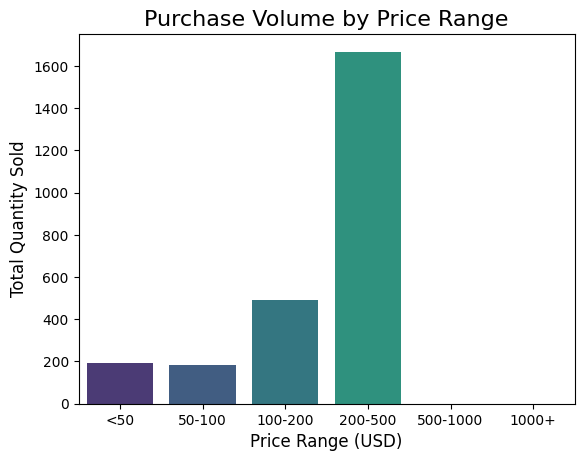

In [106]:
sns.barplot(x=price_range_volume.index, y=price_range_volume.values, palette="viridis")
plt.title("Purchase Volume by Price Range", fontsize=16)
plt.xlabel("Price Range (USD)", fontsize=12)
plt.ylabel("Total Quantity Sold", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Insight 7: Signup Trends Over Time

In [98]:
cust['SignupDate'] = pd.to_datetime(cust['SignupDate'])
cust['SignupYear'] = cust['SignupDate'].dt.year
cust.head()

,CustomerID,CustomerName,Region,SignupDate,SignupYear
0,C0001,Lawrence Carroll,South America,2022-07-10,2022
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022
2,C0003,Michael Rivera,South America,2024-03-07,2024
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022
4,C0005,Laura Weber,Asia,2022-08-15,2022


In [99]:
signup_trends = cust['SignupYear'].value_counts().sort_index()
signup_trends

,count
SignupYear,
2022,64
2023,57
2024,79


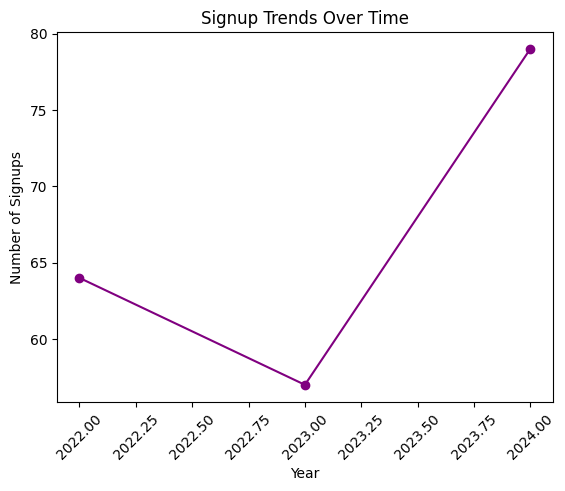

In [112]:
signup_trends.plot(kind='line', marker='o', color='purple')
plt.title("Signup Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.show()